# Calculate Shifts, Percent Change, and Windows on Time Series

Use this template to perform foundational manipulations on your time-series data. It covers shifting your data backward or forwards in time (i.e., lags and leads), calculating the percent change between periods, and window aggregations. There are many applications for these types of manipulations, including tracking financial assets, sales forecasting, and analyzing marketing data.

To swap in your dataset in this template, the following is required:
- You must have a dataset with a date column that can be parsed by pandas. This is checked in the code, and if you encounter difficulties, you can consult the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) for further assistance.
- You must have at least one variable that you are interested in analyzing (e.g., price, sales, etc.).

The placeholder dataset in this template is Google stock price data, containing the closing price on each trading day.

In [1]:
# Load packages
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme and settings for future plots
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 80

## Setting Up Your Data

Before you begin, you will want to set up your data correctly. The [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function from pandas offers several arguments that make working with time series easier from the start:
- `index_col` will allow you to immediately set the date as the index, allowing easier manipulations afterward.
- `parse_dates` instructs pandas to parse the index as a date if possible.

You can then slice the DataFrame to select the dates/times you are most interested in using. You can read more about time series and date functionality within pandas [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#slice-vs-exact-match). The string you use to slice the DataFrame can be a partial match or a full match.

In [2]:
# Replace this with the name of the column that contains your date information
date_col = "date"

# Replace with the file you want to use and load your dataset into a DataFrame
df = pd.read_csv("google.csv", index_col=date_col, parse_dates=True)

# Check that the index is correctly converted to a date
print("The index been parsed as a date: " + str(is_datetime(df.index)))

The index been parsed as a date: True


If the code above returns False, then you will need to use pandas' [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function to correctly set the index to a date.

Next, you can specify the variable of interest and choose a date range.

In [3]:
# Specify the variable of interest
var_col = "close"  # Replace this with the name of the column you want to analyze

# Reduce the DataFrame down to the relevant columns
df_subset = df[[var_col]]  # Pass in the column(s) of interest as a list here

# Select the date range you want to explore
df_time = df_subset[
    "2020-1-1":"2021-1-1"  # Pass in the date ranges you are interested in here
].copy()

# Preview the DataFrame
df_time

,close
date,
2020-01-02 00:00:00+00:00,1367.37
2020-01-03 00:00:00+00:00,1360.66
2020-01-06 00:00:00+00:00,1394.21
2020-01-07 00:00:00+00:00,1393.34
2020-01-08 00:00:00+00:00,1404.32
...,...
2020-12-24 00:00:00+00:00,1738.85
2020-12-28 00:00:00+00:00,1776.09
2020-12-29 00:00:00+00:00,1758.72


## Shifting Data

The [.shift()](https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html) method allows you to shift data by a given number of periods. A negative number will produce a lag backward in time, and a positive number will produce a lead forward in time.

Seaborn's [lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html) function allows you to plot the three columns (the original data, the data shifted backward, and the data shifted forward) for comparison. 

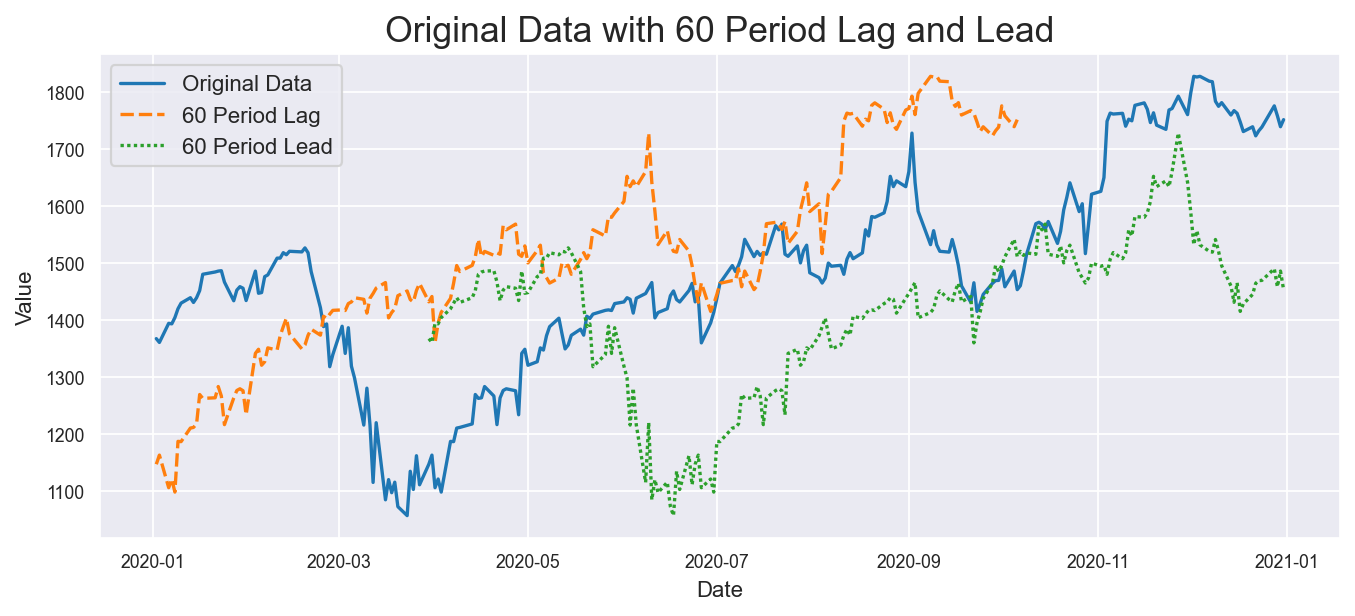

In [4]:
# Use this line to specify the number of periods to shift
shift_periods = 60

# Create a column shifted backward by the number of periods specified above (lag)
df_time["lag_data"] = df_time[var_col].shift(-shift_periods)

# Create a column shifted forward by the number of periods specified above (lead)
df_time["lead_data"] = df_time[var_col].shift(shift_periods)

# Plot the three columns to inspect the lead and lag
sns.lineplot(data=df_time)

# Customize the legend
plt.legend(
    labels=[
        "Original Data",
        str(shift_periods) + " Period Lag",
        str(shift_periods) + " Period Lead",
    ]
)

# Set the plot title and labels
plt.xlabel("Date")
plt.xticks(size=8)
plt.ylabel("Value")
plt.yticks(size=8)
plt.title(
    "Original Data with " + str(shift_periods) + " Period Lag and Lead", fontsize=16
)

# Show the plot
plt.show()

## Percent Change

The [.pct_change()](https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html) method allows you to calculate the percentage change between the current row and another previous row. There are two things to note about the code shown below.
- The `periods` parameter specifies which row to use when calculating the percentage change. It defaults to 1, which means it uses the immediately previous row. Here, 30 periods are used.
- By default, `.pct_change()` returns a decimal. `.mul(100)` multiplies the percentage by 100 for easier reading.

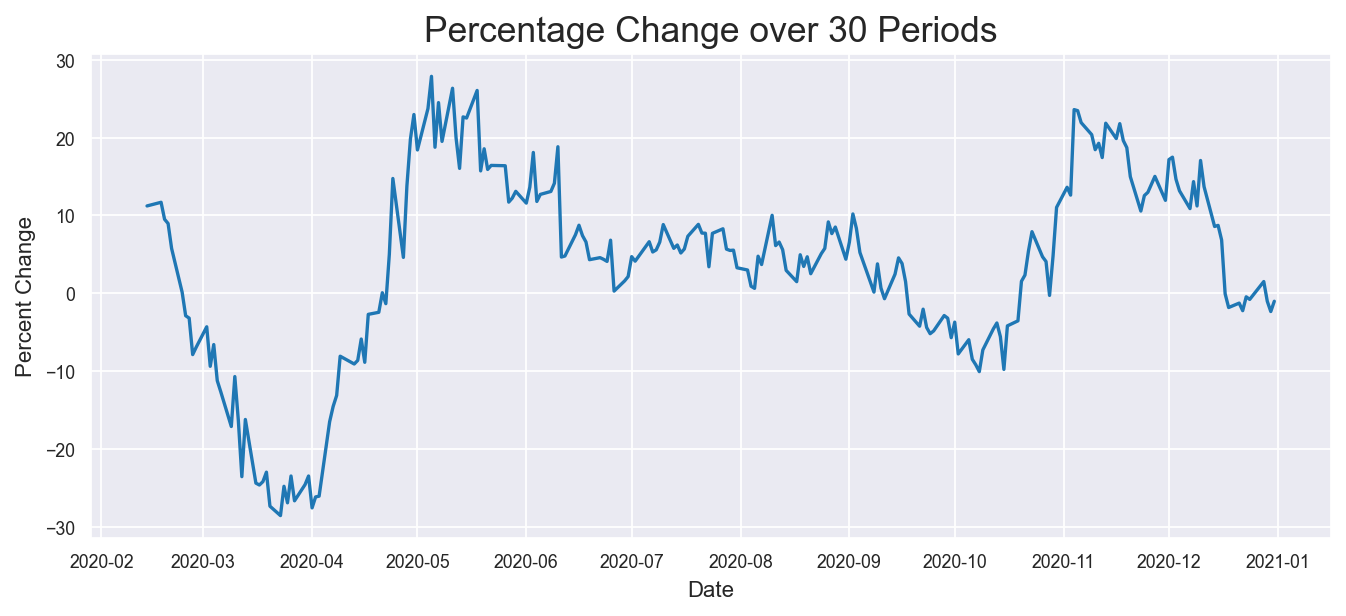

In [5]:
# Use this line to specify the rate of change you want to calculate
pct_return_periods = 30

# Create a column with the percentage increase and multiply by 100
df_time["percent_change"] = (
    df_time[var_col].pct_change(periods=pct_return_periods).mul(100)
)

# Plot the percentage change
sns.lineplot(data=df_time["percent_change"], label="Percentage Change", legend=False)

# Set the plot title and labels
plt.xlabel("Date")
plt.xticks(size=8)
plt.ylabel("Percent Change")
plt.yticks(size=8)
plt.title("Percentage Change over " + str(pct_return_periods) + " Periods", fontsize=16)

# Show the plot
plt.show()

## Window Functions

You can use window functions to perform aggregations of data over time. A window function can be rolling, such as the average price over the past 30 days. A window function can also be expanding, such as the total sum of products sold over time. This example uses two pandas methods:
- [`.rolling()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) performs a rolling window calculation on a specified `window`. An aggregation function can be then added. 
    - Note that `window` can also be a datetime offset (such as `'30D'`). This will use all values within that timeframe (rather than a fixed number of rows).
- [`.expanding()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html) performs an expanding window calculation (i.e., of all previous rows). Again, an aggregation function can then be added.

In this example, [`.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) is used. However, there are many different aggregation functions available, including [`.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html), [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html), [`.max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html), and [`.min()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html).

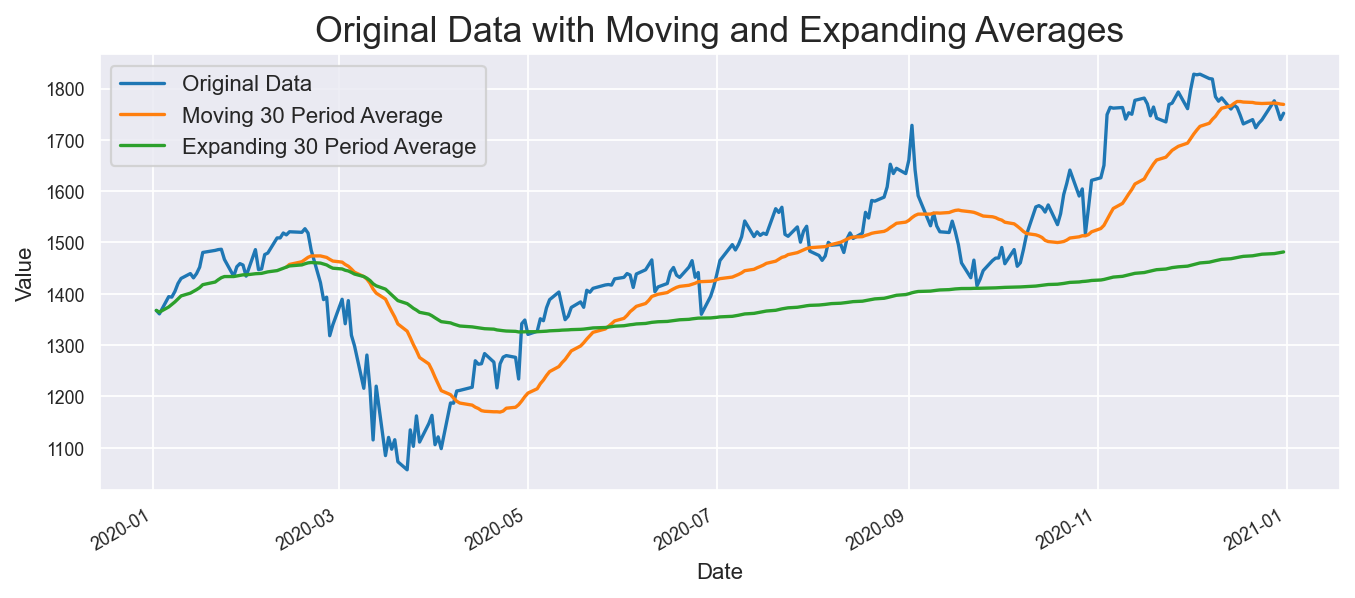

In [6]:
# Use this line to specify the size of the window you wish to use
window = 30  # Specify your chosen window here

# Create a column with a moving average using the window specified above
df_time["moving_average"] = df_time[var_col].rolling(window).mean()

# Create a column with an expanding average over all previous rows
df_time["expanding_average"] = df_time[var_col].expanding().mean()

# Plot the three columns
df_time[[var_col, "moving_average", "expanding_average"]].plot()

# Customize the legend
plt.legend(
    labels=[
        "Original Data",
        "Moving " + str(window) + " Period Average",
        "Expanding " + str(window) + " Period Average",
    ]
)

# Set the plot title and labels
plt.xlabel("Date")
plt.xticks(size=8)
plt.ylabel("Value")
plt.yticks(size=8)
plt.title("Original Data with Moving and Expanding Averages", fontsize=16)

# Show the plot
plt.show()

These techniques lay the foundation for drawing insights from time series data. The next step is analyzing your data. If you're interested, be sure to check out the [Time Series Analysis in Python](https://app.datacamp.com/learn/courses/time-series-analysis-in-python) course.

If you would like to learn more about time series manipulations, be sure to review the [Manipulating Time Series Data in Python](https://app.datacamp.com/learn/courses/manipulating-time-series-data-in-python).